## <font size=5> <strong>Heart Disease Prediction By Shreekant Gosavi


In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## I. Importing essential libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## II. Importing and understanding our dataset

In [74]:
dataset = pd.read_csv("/content/drive/MyDrive/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [75]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [76]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [77]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


#### Description

In [79]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [81]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [82]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [83]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [84]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [85]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [86]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


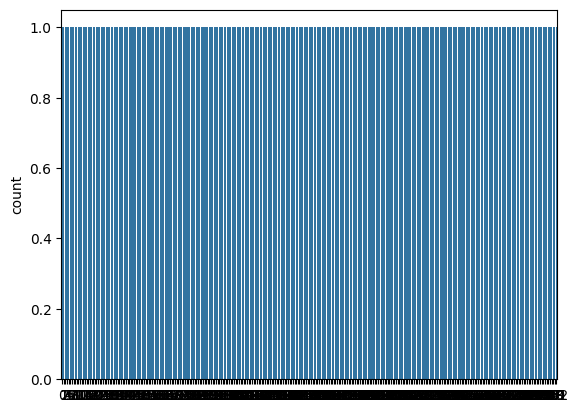

In [87]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [88]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

## IV. Train Test split

In [89]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [90]:
X_train.shape

(242, 13)

In [91]:
X_test.shape

(61, 13)

In [92]:
Y_train.shape

(242,)

In [93]:
Y_test.shape

(61,)

## V. Model Fitting

In [94]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [96]:
Y_pred_lr.shape

(61,)

In [97]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2) # 예측된 결과와 실제 결과를 비교해 모델의 정확도 계산

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [131]:
#  compute_cost 함수는 로지스틱 회귀 모델의 비용을 계산
# 비용은 모델이 예측한 값과 실제 값 사이의 차이를 측정해 계산
#  update_parameters 함수는 모델의 가중치와 편향을 업데이트
# 이 함수는 모델의 예측이 실제와 얼마나 잘 일치하는지 측정해 모델의 성능을 평가

# update_parameters 함수는 가중치와 편향을 업데이트
# 경사 하강법을 사용해 비용 함수를 최소화하기 위해 모델 파라미터를 조정
# 경사 하강법 단계마다 새로운 가중치와 편향을 계산하고 업데이트
# 모델이 데이터를 잘 설명하는 방향으로 학습된다.

# compute_cost는 함수의 모델의 성능을 측정, update_parameters는 모델이 학습하는 데 필요한 파라미터를 조정

In [138]:
import numpy as np

# 시그모이드 함수: 실수 값z를 받아 시그모이드 값 반환
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 로지스틱 회귀의 비용 계산
def compute_cost(X, y, theta):
    m = len(y) # 샘플 개수
    h = sigmoid(X.dot(theta))  # 예측값
    epsilon = 1e-5  # 로그 함수 안의 값이 0이 되는 것을 방지하기 위한 epsilon
    cost = (1/m) * (-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))
    return cost

# 경사 하강법을 사용해 파라미터 업데이트
def update_parameters(X, y, theta, learning_rate, num_iters): # learning_rate 학습률, num_iters 경사 하강법의 반복 횟수
    m = len(y)  # 샘플 개수
    cost_history = np.zeros(num_iters)  # 비용의 변화를 추적하기 위한 배열 초기화

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))  # 예측값 계산
        gradient = (1/m) * X.T.dot(h - y)  # 비용 함수의 그래디언트 계산
        theta -= learning_rate * gradient  # 파라미터 업데이트

        cost = compute_cost(X, y, theta)  # 현재 비용 계산
        cost_history[i] = cost  # 비용 기록

    return theta, cost_history

학습된 theta 값: age        -1.558532
sex        -0.790157
cp          1.696335
trestbps   -3.784260
chol        0.155792
fbs        -0.002568
restecg     0.081534
thalach     5.252471
exang      -0.795341
oldpeak    -1.966565
slope       0.516676
ca         -1.769276
thal       -0.989874
dtype: float64


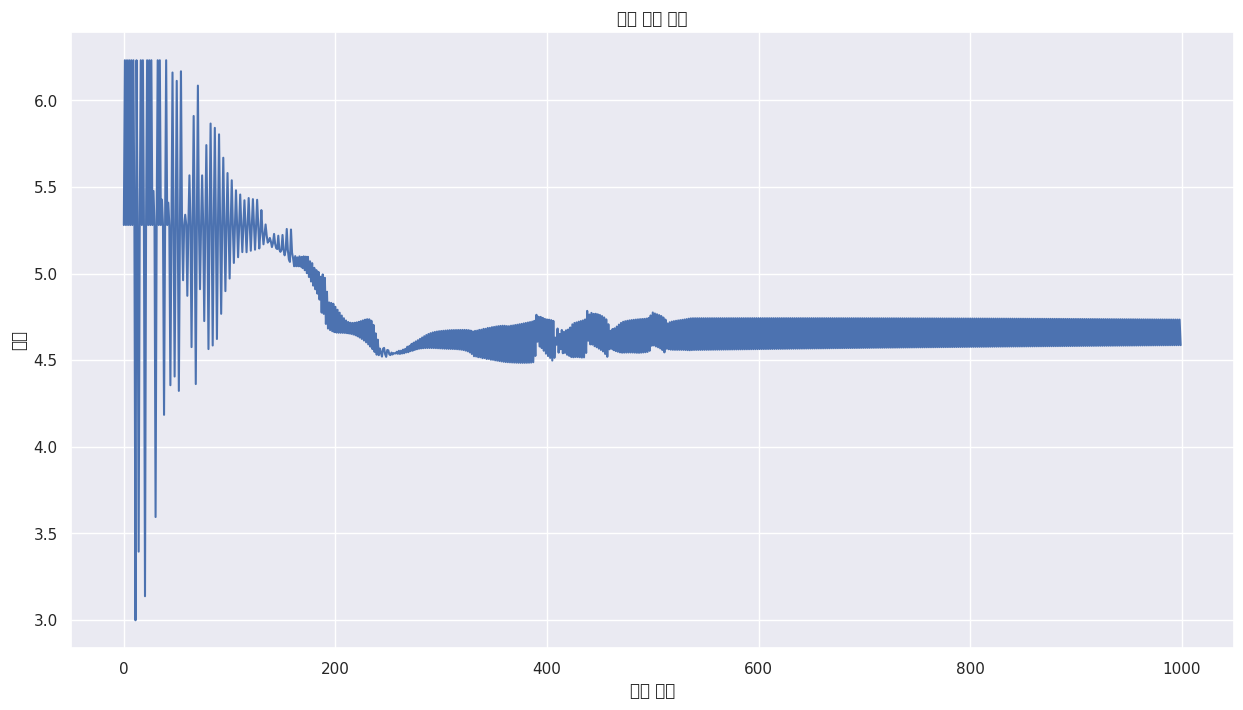

In [133]:
# 모델 파라미터 초기화
theta = np.zeros(X_train.shape[1])

# 학습률과 반복 횟수 설정
learning_rate = 0.01
num_iters = 1000

# 모델 학습
theta, cost_history = update_parameters(X_train, Y_train, theta, learning_rate, num_iters)

# 학습된 모델의 파라미터 확인
print("학습된 theta 값:", theta)

# 비용의 변화 확인
plt.plot(range(num_iters), cost_history)
plt.xlabel("반복 횟수")
plt.ylabel("비용")
plt.title("비용 함수 변화")
plt.show()

### Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [101]:
Y_pred_nb.shape

(61,)

In [102]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [ ]:
# 시각화 코드

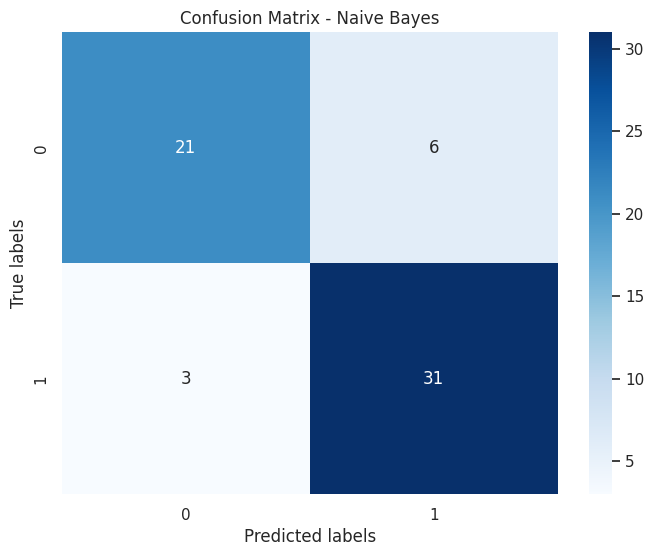

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 혼동 행렬 생성
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_nb)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


In [ ]:
# 시각화 자료 해석 방법
# 주 대각선(대각선 요소)
# 주 대각선에 위치한 요소들은 예측된 클래스와 실제 클래스가 일치하는 경우를 보여줌
# 주 대각선의 값이 클수록 모델이 해당 클래스를 정확하게 예측했다.

# 비대각 요소들
# 비대각 요소는 모델이 클래스를 잘못 예측한 경우를 보여줌

# 정확성 : 주 대각선의 값이 클수록 모델이 더 정확하게 예측하는 경향이 있음

# 예측 모델 테스트 데이터는 총 61개를 예측
# TN 21개  FN 6개
# FP 3개   TP 31개

# 정확도(Accuracy) = (TP + TN) / (TP + TN + FP + FN)
# 0.8524 = (31+21) / (31+21+3+6)

# 재현율 = TP / (TP + FN)
# 0.8378 = 31 / (31+6)


# 참고자료
# https://diseny.tistory.com/entry/%ED%98%BC%EB%8F%99%ED%96%89%EB%A0%ACconfusion-matrix?category=906035
# https://truman.tistory.com/179
# https://jaylala.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-with-Python-%EC%98%A4%EC%B0%A8%ED%96%89%EB%A0%AC-or-%ED%98%BC%EB%8F%99%ED%96%89%EB%A0%ACConfusion-Matrix-%EC%9C%A0%EB%B0%A9%EC%95%94-%EB%8D%B0%EC%9D%B4%ED%84%B0Breast-Cancer-Data-%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC-%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0


### SVM

In [ ]:
# Scikit-learn 라이브러리를 사용해 선형 SVM을 구현하고 테스트 데이터에 대한 예측 정확도 계산.
# 분류 작업을 숭행하는 지도 학습 알고리즘

In [103]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [104]:
Y_pred_svm.shape # 예측된 결과(Y_pred_svm)의 형태를 반환

(61,)

In [105]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2) # 예측된 결과와 실제 결과(Y_test)를 비교하여 모델의 정확도를 계산

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [107]:
Y_pred_knn.shape

(61,)

In [108]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [110]:
print(Y_pred_dt.shape)

(61,)


In [ ]:
# 시각화 코드

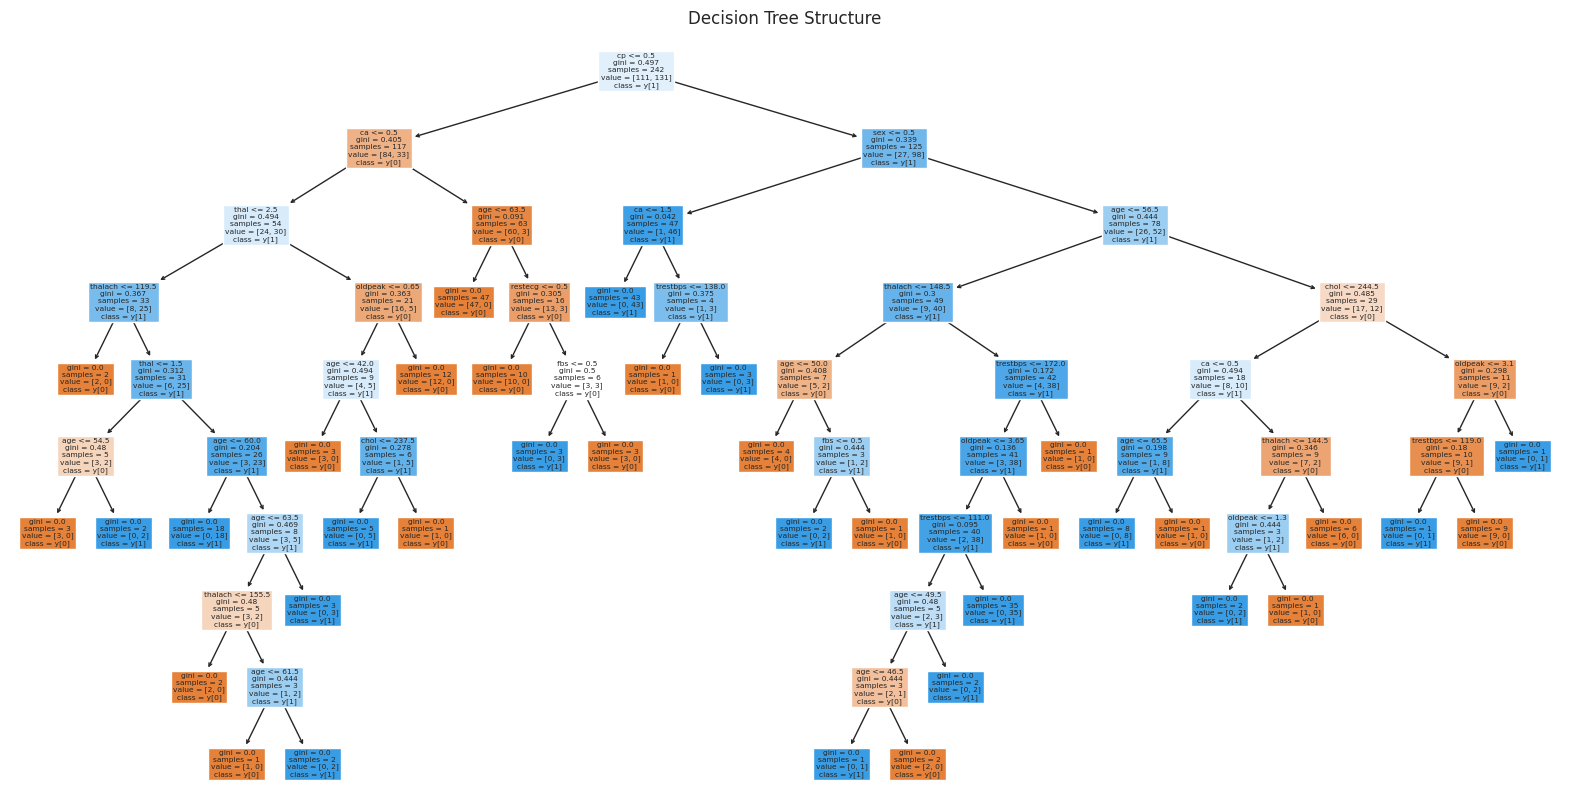

In [141]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=True)
plt.title("Decision Tree Structure")
plt.show()


In [111]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [113]:
Y_pred_rf.shape

(61,)

In [114]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


### XGBoost

In [142]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [116]:
Y_pred_xgb.shape

(61,)

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# 혼동 행렬 생성
conf_matrix_xgb = confusion_matrix(Y_test, Y_pred_xgb)
print("혼동 행렬:\n", conf_matrix_xgb)


혼동 행렬:
 [[22  5]
 [ 5 29]]


In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, Y_pred_xgb):
    confusion = confusion_matrix(y_test, Y_pred_xgb)
    accuracy = accuracy_score(y_test, Y_pred_xgb)
    precision = precision_score(y_test, Y_pred_xgb)
    recall = recall_score(y_test, Y_pred_xgb)
    F1 = f1_score(y_test, Y_pred_xgb)
    AUC = roc_auc_score(y_test, Y_pred_xgb)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [154]:
get_clf_eval(Y_test, Y_pred_xgb)

오차행렬:
 [[22  5]
 [ 5 29]]

정확도: 0.8361
정밀도: 0.8529
재현율: 0.8529
F1: 0.8529
AUC: 0.8339


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

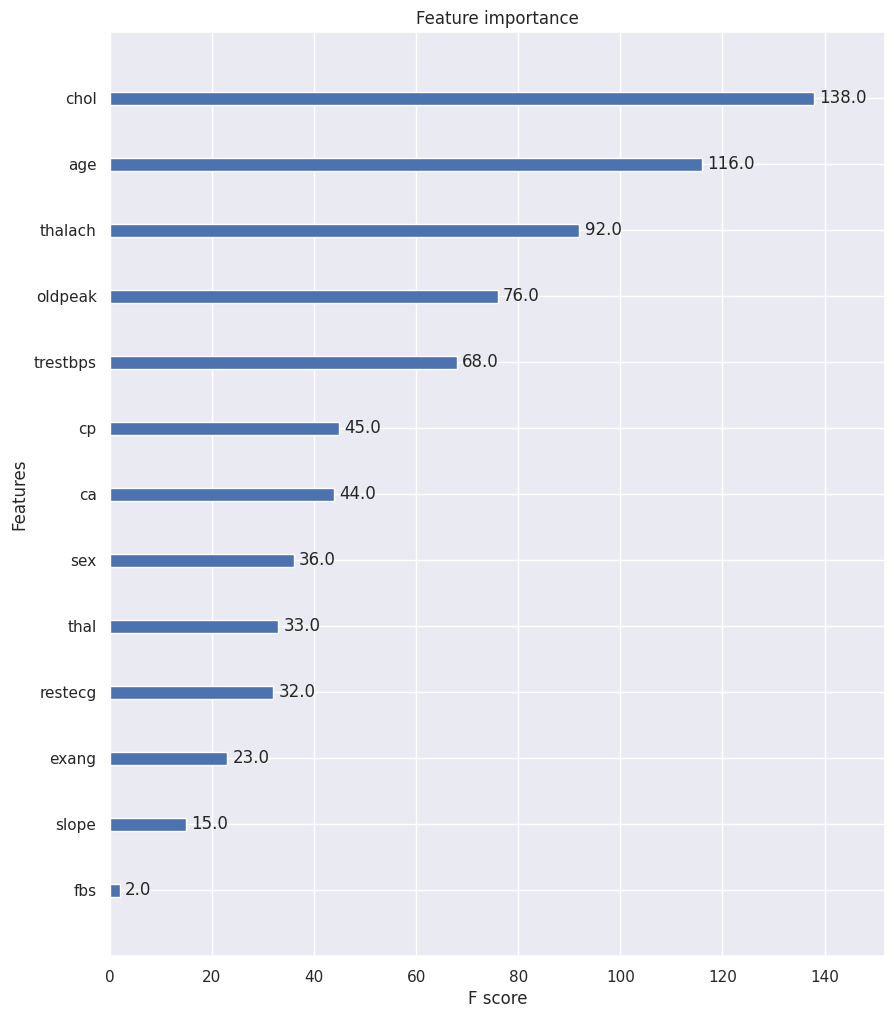

In [157]:
#### 덧붙이는 코드

## 고전적인 전역 변수 중요도 측정 방법
## 값이 높을 수록 중요한 예측 변수에 해당한다.
## 참고사이트 : https://aldente0630.github.io/data-science/2018/12/10/interpretable_ml_with_xgb.html

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [117]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


### Neural Network

In [118]:
from keras.models import Sequential
from keras.layers import Dense

In [156]:
# 데이터 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [119]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [120]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 4ms/step - loss: 17.8624 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 12.3177 - accuracy: 0.4587
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 7.4246 - accuracy: 0.4587
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 3.2371 - accuracy: 0.4421
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 1.6339 - accuracy: 0.5868
Epoch 6/300
8/8 [==============================] - 0s 4ms/step - loss: 1.9577 - accuracy: 0.6322
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 1.7817 - accuracy: 0.6198
Epoch 8/300
8/8 [==============================] - 0s 4ms/step - loss: 1.5479 - accuracy: 0.5579
Epoch 9/300
8/8 [==============================] - 0s 4ms/step - loss: 1.5732 - accuracy: 0.5496
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 1.4992 - accuracy: 0.5620
Epoch 11/300
8/8 [=========

In [121]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [122]:
Y_pred_nn.shape

(61, 1)

In [123]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [124]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 85.25 %


In [ ]:
# 로지스틱 회귀 모델 또는 다른 분류 모델에서 사용될 수 있는 함수
# 모델이 예측한 결정 경계를 기준으로 각 데이터 포인트가 어느 클래스에 속하는지 결정하는데 사용

# x에 대한 모델의 예측 결과를 반환한다.
# 순전파를 통해 예측 확률을 계산하고 이진 분류 임계값인 0.5를 기준으로 확률을 이진 예측(0 또는 1)로 변환한다.

In [139]:
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (m, K)

    Returns:
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Forward propagation
    a3, _ = forward_propagation(X, parameters)

    # Convert probabilities to binary predictions
    predictions = (a3 > 0.5)

    return predictions


## VI. Output final score

In [136]:
# 모델의 정확도를 scores 리스트에 저장
# 모델의 이름을 algorithms 리스트에 저장한 후 반복문을 사용하여 각 모델의 정확도를 출력

In [135]:
## VI. Output final score

scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 85.25 %


TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

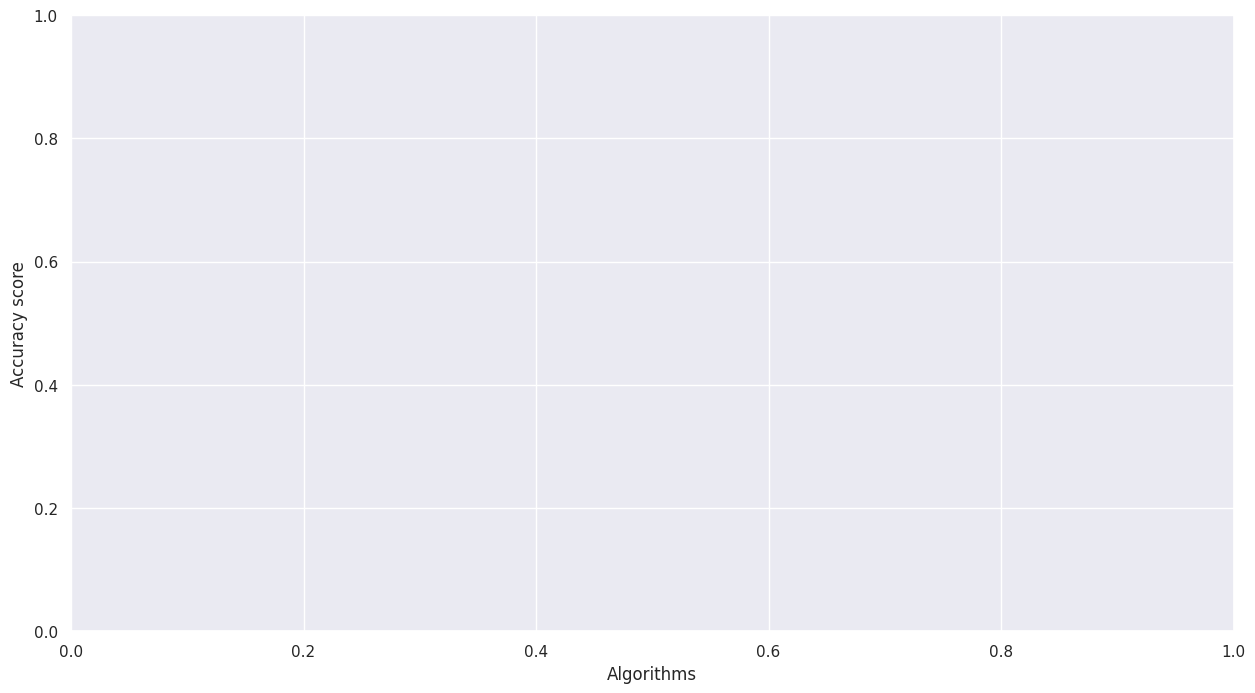

In [137]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>